In [1]:
# import module from sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

In [2]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
# assign data and label to variables
df_x = diabetes.data
df_y = diabetes.target
print(df_x.shape, df_y.shape)

(442, 10) (442,)


In [4]:
X = np.array(df_x)
y = np.array(df_y)

In [5]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [6]:
# looking at shape, X has 10 features/columns and W should follow the same
W = np.random.rand(10)
b = np.random.rand()

In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def mse(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.47103636  -13.66693492 -189.53993898 -142.55894505  -68.27223201
  -56.00492849  127.6426825  -138.99228517 -182.84921097 -123.48350973]
db: -303.59441964118474


In [9]:
learning_rate = 0.001

losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW # W = W - learning rate * dw
    b -= learning_rate * db # b = b - learning rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 20237.5953
Iteration 200 : Loss 15250.7552
Iteration 300 : Loss 11852.2493
Iteration 400 : Loss 9523.2367
Iteration 500 : Loss 7915.6758
Iteration 600 : Loss 6795.9493
Iteration 700 : Loss 6007.1139
Iteration 800 : Loss 5443.6200
Iteration 900 : Loss 5034.3797
Iteration 1000 : Loss 4731.4259
Iteration 1100 : Loss 4502.3129
Iteration 1200 : Loss 4325.0252
Iteration 1300 : Loss 4184.5636
Iteration 1400 : Loss 4070.6564
Iteration 1500 : Loss 3976.2229
Iteration 1600 : Loss 3896.3425
Iteration 1700 : Loss 3827.5614
Iteration 1800 : Loss 3767.4256
Iteration 1900 : Loss 3714.1672
Iteration 2000 : Loss 3666.4911
Iteration 2100 : Loss 3623.4320
Iteration 2200 : Loss 3584.2562
Iteration 2300 : Loss 3548.3948
Iteration 2400 : Loss 3515.3980
Iteration 2500 : Loss 3484.9034
Iteration 2600 : Loss 3456.6138
Iteration 2700 : Loss 3430.2816
Iteration 2800 : Loss 3405.6981
Iteration 2900 : Loss 3382.6846
Iteration 3000 : Loss 3361.0874
Iteration 3100 : Loss 3340.7726
Iteration 3200

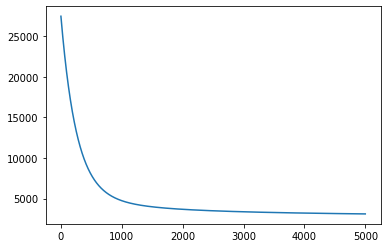

In [10]:
# visualizing iteration and loss function 
plt.plot(losses)
plt.show()

In [11]:
print(W, b)

[  32.92417598  -95.06738836  331.71601374  215.53046876   24.17687733
   -9.55731091 -182.25507709  156.18798943  299.490013    153.29625504] 150.91657404485883


In [12]:
# testing a model with test data
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3374.3348741816753

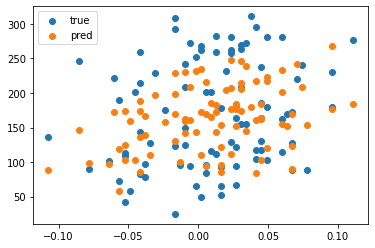

In [13]:
# visualizing with scatter plot to see the predicted values and true vlaues in a same plot
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.legend()
plt.show()